In [1]:
import json
import pandas as pd

In [80]:
anime = json.load(open("anime-mapped.json", "r"))
characters = json.load(open("characters-with-description.json", "r"))
characters = list(filter(lambda x: "description" in x, characters))

In [81]:
df_anime = pd.DataFrame.from_dict(anime)
df_characters = pd.DataFrame.from_dict(characters)
df = pd.merge(df_characters, df_anime, how="left", left_on="anime_id", right_on="anilist_id")
df

,anime_id,character_id,name,image_url,image_url_medium,image_url_large,description,title,anilist_id,year,season
0,150672,188783,有馬かな,https://s4.anilist.co/file/anilistcdn/characte...,https://s4.anilist.co/file/anilistcdn/characte...,https://s4.anilist.co/file/anilistcdn/characte...,赤い髪に切りそろえられた前髪が特徴で、大きな目は同じく赤みがかった瞳を持っています。顔立ちは...,"""Oshi no Ko""",150672,2023,SPRING
1,150672,183885,星野アクアマリン,NaN,https://s4.anilist.co/file/anilistcdn/characte...,https://s4.anilist.co/file/anilistcdn/characte...,このキャラクターの髪の色は淡いピンクや金髪が混ざったような色合いで、多少の光沢があります。瞳...,"""Oshi no Ko""",150672,2023,SPRING
2,150672,183884,星野ルビー,NaN,https://s4.anilist.co/file/anilistcdn/characte...,https://s4.anilist.co/file/anilistcdn/characte...,長いピンクがかった金髪の髪の毛を持つこのアニメキャラクターは、瞳は大きくて明るい色をしており...,"""Oshi no Ko""",150672,2023,SPRING
3,97638,153368,パスカル,NaN,https://s4.anilist.co/file/anilistcdn/characte...,https://s4.anilist.co/file/anilistcdn/characte...,このキャラクターは鮮やかな黄色の体を持ち、全体的に円形を基調としたデザインが特徴的です。瞳の...,100% Pascal-sensei (TV),97638,2017,SPRING
4,97638,155204,早川はやと,NaN,https://s4.anilist.co/file/anilistcdn/characte...,https://s4.anilist.co/file/anilistcdn/characte...,このキャラクターは、茶色の髪を持つ少年で、髪型は元気そうな短髪で前髪が額にかかっています。瞳...,100% Pascal-sensei (TV),97638,2017,SPRING
...,...,...,...,...,...,...,...,...,...,...,...
3537,151679,284538,スノウ,NaN,https://s4.anilist.co/file/anilistcdn/characte...,https://s4.anilist.co/file/anilistcdn/characte...,アニメキャラクターは銀色の髪を持っていて、長い髪を後ろでまとめています。瞳の色は青色で、とて...,Nokemono-tachi no Yoru,151679,2023,WINTER
3538,109403,54151,宮内れんげ,NaN,https://s4.anilist.co/file/anilistcdn/characte...,https://s4.anilist.co/file/anilistcdn/characte...,髪の色は明るい紫色で、瞳の色は鮮やかな赤色をしています。顔つきはあまり特徴的ではない普通の目...,Non Non Biyori Nonstop,109403,2021,WINTER
3539,109403,54149,越谷小鞠,NaN,https://s4.anilist.co/file/anilistcdn/characte...,https://s4.anilist.co/file/anilistcdn/characte...,明るい茶色の髪を持ち、緑色の大きな瞳が特徴的なアニメキャラクター。髪はふんわりとした質感で、...,Non Non Biyori Nonstop,109403,2021,WINTER
3540,109403,54145,一条蛍,NaN,https://s4.anilist.co/file/anilistcdn/characte...,https://s4.anilist.co/file/anilistcdn/characte...,茶色い髪のキャラクターで、髪の毛は長く、自然なストレートヘアが特徴です。瞳の色も茶色で、大き...,Non Non Biyori Nonstop,109403,2021,WINTER


In [82]:
df["year"].value_counts()

2018    449
2016    419
2020    416
2017    411
2019    407
2015    398
2021    345
2023    321
2022    317
2024     59
Name: year, dtype: int64

In [83]:
from sentence_transformers import SentenceTransformer

sentences = df["description"].to_list()
model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")
output = model.encode(sentences=sentences, show_progress_bar=True, normalize_embeddings=True)

c:\Users\chick\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Batches:   0%|          | 0/111 [00:00<?, ?it/s]

In [84]:
df["vector"] = output.tolist()

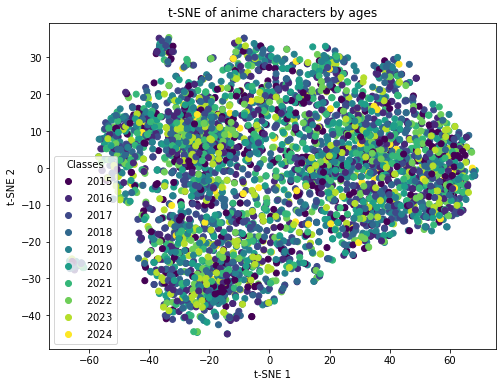

In [85]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# t-SNEの実行
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(output)

# 結果のプロット
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df["year"].to_list(), cmap='viridis')
plt.legend(*scatter.legend_elements(), title="Classes")
plt.title('t-SNE of anime characters by ages')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

In [86]:
df["vector"].values

array([list([0.028538431972265244, 0.010029423981904984, 0.06515000760555267, -0.021103575825691223, -0.06186366081237793, 0.0657365694642067, 0.09487499296665192, 0.036549162119627, 0.024058567360043526, 0.011574355885386467, 0.1839042454957962, -0.05860739201307297, 0.052540116012096405, -0.04554538056254387, -0.09328043460845947, -0.08586425334215164, 0.01716921105980873, -0.03431495279073715, -0.03483504056930542, 0.03690866008400917, -0.014043192379176617, -0.018321828916668892, -0.0136265205219388, -0.05088811367750168, -0.03632933273911476, 0.0045082285068929195, -0.04321116581559181, 0.03406312316656113, 0.043277569115161896, -0.015753665938973427, -0.024687599390745163, 0.05634952336549759, -0.052349790930747986, -0.029597800225019455, 0.02140691690146923, -0.0012417498510330915, -0.006925072520971298, -0.0393565408885479, 0.04833096265792847, 0.06642036139965057, -0.03100249357521534, -0.0603085458278656, -0.0317896343767643, -0.0694071501493454, -0.0030830921605229378, -0.00

In [87]:
import numpy as np

def concat(by_year):
    return np.vstack(by_year["vector"].values)

df_by_years = df[["year", "vector"]].groupby("year", as_index=False).apply(concat)
df_by_years[0].mean()

-0.00284067028007329

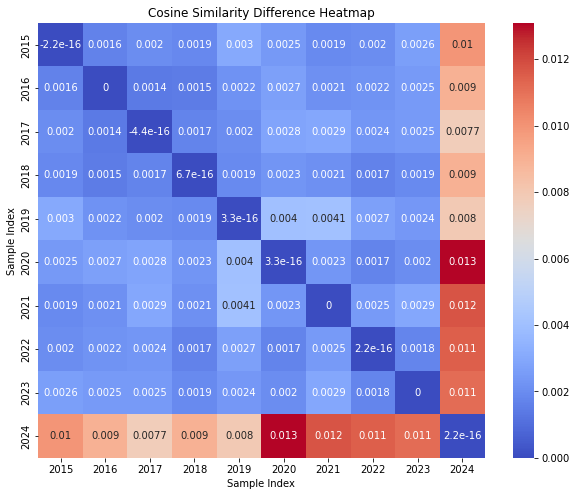

In [88]:
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

# 平均ベクトル
mean_vectors = []

for year in df_by_years:
    mean_vectors.append(year.mean(axis=0))

cos_sim = cosine_similarity(mean_vectors)
difference = 1 - cos_sim

labels=range(2015,2025)

plt.figure(figsize=(10, 8))
sns.heatmap(difference, annot=True, cmap='coolwarm', xticklabels=labels, yticklabels=labels)
plt.title('Cosine Similarity Difference Heatmap')
plt.xlabel('Sample Index')
plt.ylabel('Sample Index')
plt.show()

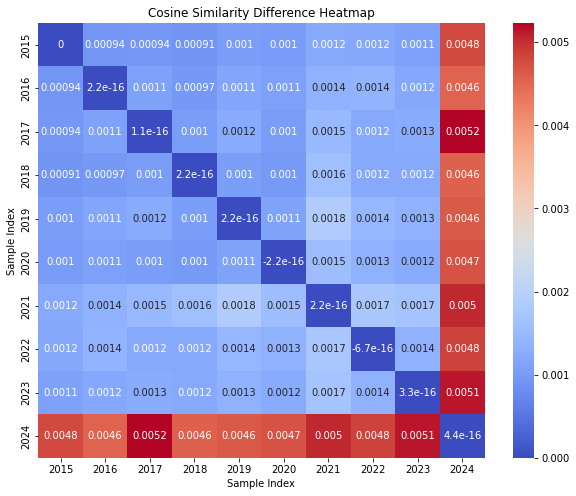

In [89]:
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

# 平均ベクトル
mean_vectors = []

for year in df_by_years:
    mean_vectors.append(year.std(axis=0))

cos_sim = cosine_similarity(mean_vectors)
difference = 1 - cos_sim

labels=range(2015,2025)

plt.figure(figsize=(10, 8))
sns.heatmap(difference, annot=True, cmap='coolwarm', xticklabels=labels, yticklabels=labels)
plt.title('Cosine Similarity Difference Heatmap')
plt.xlabel('Sample Index')
plt.ylabel('Sample Index')
plt.show()